# Data Loading & Preprocessing

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as scikit_learn

In [4]:
csv_path = "/Users/saifmohammed/Desktop/CSE299-Junior-Design-Project/ML/Test/Copy Dataset/Diabetes_Final_Data_V21.csv"
df = pd.read_csv(csv_path)
df

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,Male,83,164,89,6.47,1.60,64.0,24.99,0,1,0,1,0,No
5433,75,Male,67,141,104,8.31,1.65,62.0,22.75,0,0,0,0,0,Yes
5434,40,Female,67,134,114,7.61,1.50,69.0,30.72,0,1,0,0,1,No
5435,36,Female,62,139,80,4.90,1.52,41.5,17.87,0,0,0,0,0,No


In [5]:
df.shape

(5437, 15)

In [4]:
df.isnull().sum()

age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64

In [6]:
df[df.duplicated()]

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic


<Axes: xlabel='age'>

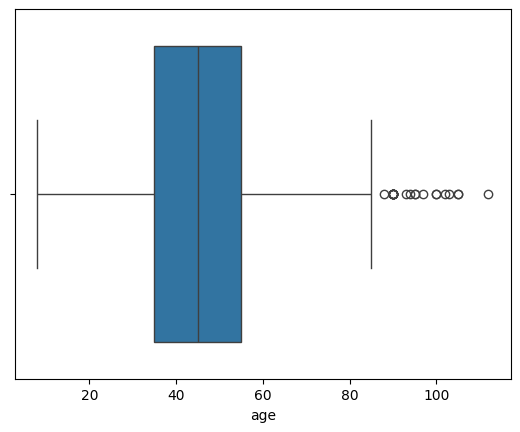

In [7]:
sns.boxplot(x=df['age'])

In [8]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Filter the outlier values in the 'age' column
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# Display the outlier values
outliers

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
360,90,Female,60,222,111,7.58,1.60,58.2,22.73,0,1,0,0,0,No
404,90,Male,68,180,76,8.44,1.65,70.3,25.79,0,1,0,1,0,No
487,97,Male,121,143,88,8.68,1.55,49.4,20.58,0,0,0,0,0,No
633,94,Female,81,187,86,5.12,1.32,24.5,14.04,0,0,0,0,0,No
713,105,Male,78,160,85,9.77,1.63,45.0,17.03,0,0,0,0,0,No
768,90,Male,63,132,59,7.77,1.52,48.0,20.67,0,0,0,0,0,No
887,90,Male,93,179,95,6.40,1.47,25.5,11.75,0,0,0,0,0,No
1250,95,Male,71,148,75,7.20,1.60,65.8,25.70,0,0,0,0,0,No
1769,105,Female,90,153,77,8.64,1.47,36.0,16.59,0,0,0,0,0,No
1862,93,Male,79,110,67,8.32,1.65,58.0,21.28,0,0,0,0,0,No


In [10]:
# Filter the non-outlier values in the 'age' column
non_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Display the non-outlier values
non_outliers

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,Male,83,164,89,6.47,1.60,64.0,24.99,0,1,0,1,0,No
5433,75,Male,67,141,104,8.31,1.65,62.0,22.75,0,0,0,0,0,Yes
5434,40,Female,67,134,114,7.61,1.50,69.0,30.72,0,1,0,0,1,No
5435,36,Female,62,139,80,4.90,1.52,41.5,17.87,0,0,0,0,0,No


In [11]:
non_outliers.shape

(5414, 15)

<Axes: xlabel='age'>

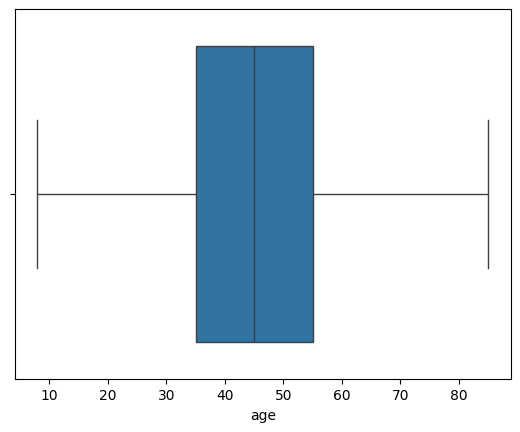

In [11]:
df = non_outliers
sns.boxplot(x=df['age'])

In [12]:
df['diabetic'].value_counts()

diabetic
No     5093
Yes     344
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5437 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5437 non-null   int64  
 1   gender                  5437 non-null   object 
 2   pulse_rate              5437 non-null   int64  
 3   systolic_bp             5437 non-null   int64  
 4   diastolic_bp            5437 non-null   int64  
 5   glucose                 5437 non-null   float64
 6   height                  5437 non-null   float64
 7   weight                  5437 non-null   float64
 8   bmi                     5437 non-null   float64
 9   family_diabetes         5437 non-null   int64  
 10  hypertensive            5437 non-null   int64  
 11  family_hypertension     5437 non-null   int64  
 12  cardiovascular_disease  5437 non-null   int64  
 13  stroke                  5437 non-null   int64  
 14  diabetic                5437 non-null   

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.loc[:, 'gender'] = le.fit_transform(df['gender'])
df.loc[:, 'diabetic'] = le.fit_transform(df['diabetic'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5414 non-null   int64  
 1   gender                  5414 non-null   int64  
 2   pulse_rate              5414 non-null   int64  
 3   systolic_bp             5414 non-null   int64  
 4   diastolic_bp            5414 non-null   int64  
 5   glucose                 5414 non-null   float64
 6   height                  5414 non-null   float64
 7   weight                  5414 non-null   float64
 8   bmi                     5414 non-null   float64
 9   family_diabetes         5414 non-null   int64  
 10  hypertensive            5414 non-null   int64  
 11  family_hypertension     5414 non-null   int64  
 12  cardiovascular_disease  5414 non-null   int64  
 13  stroke                  5414 non-null   int64  
 14  diabetic                5414 non-null   int64

In [15]:
df.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,0,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,0
1,35,0,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,0
2,62,0,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,0
3,73,1,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,0
4,68,0,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,0


In [17]:
df['diabetic'].value_counts()

diabetic
0    5093
1     344
Name: count, dtype: int64

In [18]:
from sklearn.utils import shuffle
df = shuffle(df)
df

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
223,39,0,91,110,75,5.00,1.65,40.0,14.69,0,0,0,0,0,0
4115,35,0,90,143,91,7.63,1.55,56.0,23.33,0,0,0,0,0,0
2138,65,0,72,129,78,9.33,1.57,45.0,18.15,0,0,0,0,0,0
2551,35,0,83,121,83,6.48,1.57,41.5,16.73,0,0,0,0,0,0
2801,40,1,89,144,88,7.84,1.70,58.0,20.03,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,55,1,86,160,99,11.00,1.75,70.0,22.86,0,1,0,0,0,1
4138,41,0,99,157,80,9.00,1.62,56.0,21.34,0,0,0,0,0,0
2017,32,0,77,130,90,6.68,1.55,70.1,29.20,0,0,0,0,0,0
635,38,1,76,117,79,7.91,1.63,47.7,18.05,0,0,0,0,0,0


In [19]:
df = df.reset_index()
df

,index,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,223,39,0,91,110,75,5.00,1.65,40.0,14.69,0,0,0,0,0,0
1,4115,35,0,90,143,91,7.63,1.55,56.0,23.33,0,0,0,0,0,0
2,2138,65,0,72,129,78,9.33,1.57,45.0,18.15,0,0,0,0,0,0
3,2551,35,0,83,121,83,6.48,1.57,41.5,16.73,0,0,0,0,0,0
4,2801,40,1,89,144,88,7.84,1.70,58.0,20.03,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,3984,55,1,86,160,99,11.00,1.75,70.0,22.86,0,1,0,0,0,1
5433,4138,41,0,99,157,80,9.00,1.62,56.0,21.34,0,0,0,0,0,0
5434,2017,32,0,77,130,90,6.68,1.55,70.1,29.20,0,0,0,0,0,0
5435,635,38,1,76,117,79,7.91,1.63,47.7,18.05,0,0,0,0,0,0


In [20]:
x = df.drop(columns = ['diabetic','index']) # feature 
y = df['diabetic'] # target 

In [21]:
feature_names = x.columns.tolist()
print(feature_names)

['age', 'gender', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose', 'height', 'weight', 'bmi', 'family_diabetes', 'hypertensive', 'family_hypertension', 'cardiovascular_disease', 'stroke']


In [23]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()  
std_scaled_x = std_scaler.fit_transform(x)  

std_scaled_x

array([[-0.45627263, -0.63946402,  1.15803343, ..., -0.20290876,
        -0.10827332, -0.06076249],
       [-0.7356054 , -0.63946402,  1.07665949, ..., -0.20290876,
        -0.10827332, -0.06076249],
       [ 1.35939035, -0.63946402, -0.38807156, ..., -0.20290876,
        -0.10827332, -0.06076249],
       ...,
       [-0.94510498, -0.63946402,  0.01879818, ..., -0.20290876,
        -0.10827332, -0.06076249],
       [-0.52610582,  1.56380965, -0.06257577, ..., -0.20290876,
        -0.10827332, -0.06076249],
       [-0.03727348, -0.63946402,  0.5884158 , ..., -0.20290876,
        -0.10827332, -0.06076249]], shape=(5437, 14))

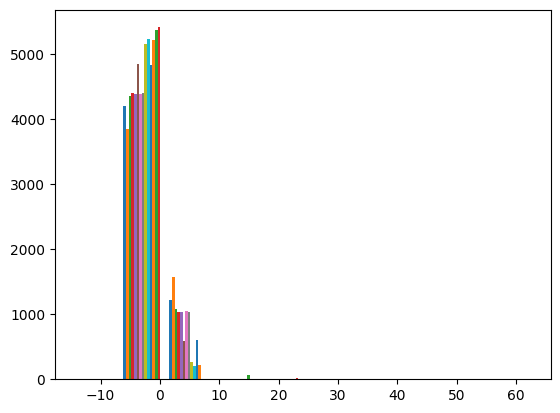

In [24]:
plt.hist(std_scaled_x)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

print("train data size", len(y_train))
print("test data size", len(y_test))

train data size 4349
test data size 1088


# Classification Model

# Decision Tree

In [30]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [29]:
dt_pred = dt_clf.predict(x_test)
dt_pred 

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

# Evaluation Matrix

In [30]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

cm = confusion_matrix(y_test, dt_pred)
cm

array([[969,  48],
       [ 46,  20]])

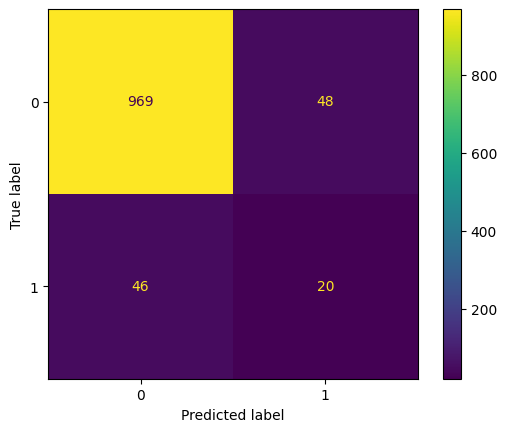

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [41]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.91
Precision: 0.29
F1: 0.30
Recall: 0.30


# ROC Curve (Reciever Operating Curve)

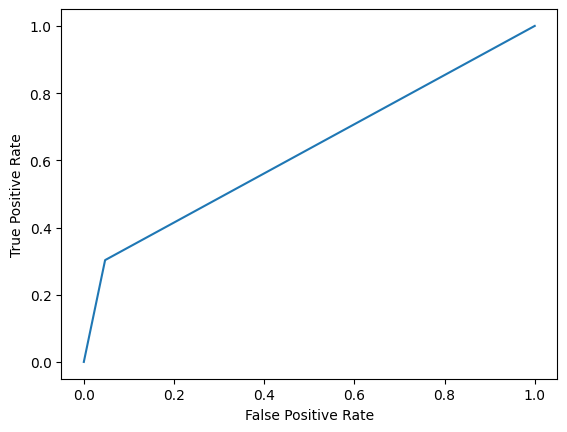

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, dt_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [40]:
from sklearn.metrics import auc

auc_score = auc(fpr,tpr)
print(f'Area Under the Curve: {auc_score:.2f}')

Area Under the Curve: 0.63


# Hyperparameter Tuning

In [2]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 50, 100],
    'min_samples_split': [5, 10, 15, 20, 25]
}

dt_clf = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

NameError: name 'x_train' is not defined